# Face swap

This was inspired by - https://www.youtube.com/watch?v=a8vFMaH2aDw

The insightface library - https://github.com/deepinsight/insightface

## Requirements

All of the imported modules below AND `onnxruntime`.

To get the `inswapper_128.onnx`, use the following link: https://www.reddit.com/r/midjourney/comments/13pnraj/please_reupload_inswapper_128onnx/


In [1]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [3]:
print('insightface version', insightface.__version__)
print('numpy version', np.__version__)

insightface version 0.7.3
numpy version 1.26.4


In [5]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))

download_path: /Users/izmalk/.insightface/models/buffalo_l


100%|█████████████████████████████████████████████████████████████████████████████████| 281857/281857 [00:36<00:00, 7714.87KB/s]
/usr/local/Cellar/jupyterlab/4.1.2/libexec/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/izmalk/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/izmalk/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/izmalk/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/izmalk/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/izmalk/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127

## Let's get the test image

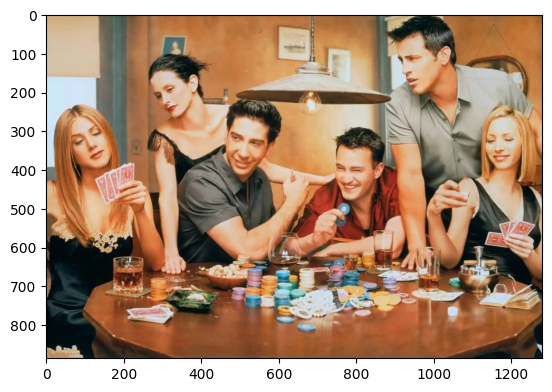

In [6]:
img = ins_get_image('t1')
plt.imshow(img[:,:,::-1]) # Reversing the channels order for proper output in plt
plt.show()

## Let's extract faces from the image

In [9]:
faces = app.get(img)

/usr/local/Cellar/jupyterlab/4.1.2/libexec/lib/python3.12/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [10]:
len(faces)

6

## We have the following info on every face

In [11]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

## Show me the faces

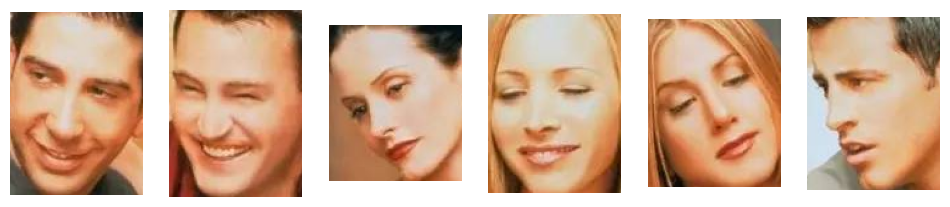

In [16]:
fig, axs = plt.subplots(1, 6, figsize=(12, 5))

for i, face in enumerate(faces):
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

## Face swapping time!

In [31]:
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


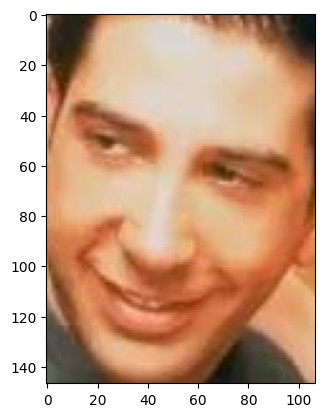

In [20]:
source_face = faces[0]
bbox = source_face['bbox']
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

In [32]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)

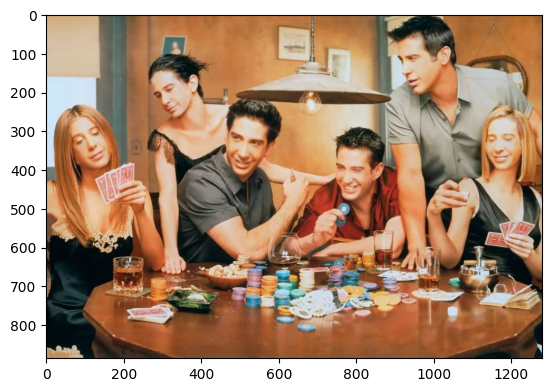

In [33]:
plt.imshow(res[:,:,::-1])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

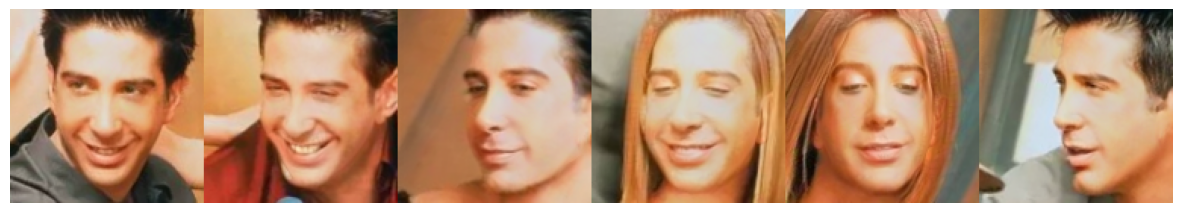

In [23]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)
res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize=(15,5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show

## Custom face swap

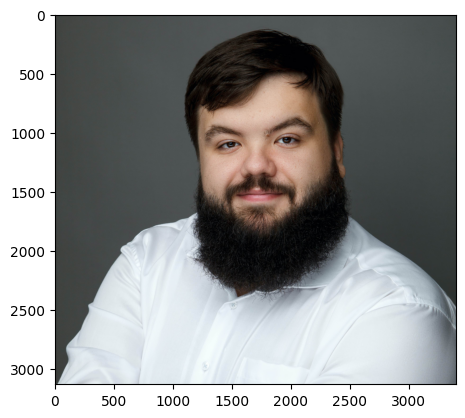

In [26]:
bob = cv2.imread('ava1-1.jpg')
plt.imshow(bob[:,:,::-1])
plt.show()

In [29]:
bob_face = app.get(bob)[0]

<function matplotlib.pyplot.show(close=None, block=None)>

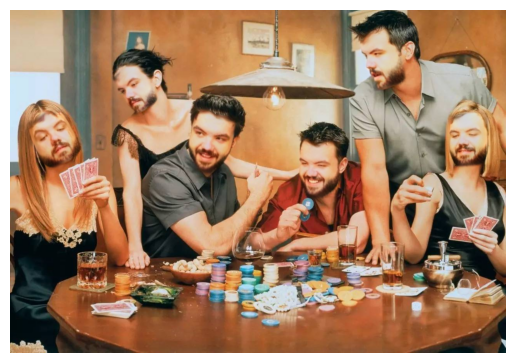

In [30]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, bob_face, paste_back=True)

fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show